# Pokemon Stats

## Data Overview
This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

The data as described by [Myles O'Neill](https://www.kaggle.com/mylesoneill) is:<br>

**#:** ID for each pokemon<br>
**Name:** Name of each pokemon<br>
**Type 1:** Each pokemon has a type, this determines weakness/resistance to attacks<br>
**Type 2:** Some pokemon are dual type and have 2<br>
**Total:** sum of all stats that come after this, a general guide to how strong a pokemon is<br>
**HP:** hit points, or health, defines how much damage a pokemon can withstand before fainting<br>
**Attack:** the base modifier for normal attacks (eg. Scratch, Punch)<br>
**Defense:** the base damage resistance against normal attacks<br>
**SP Atk:** special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)<br>
**SP Def:** the base damage resistance against special attacks<br>
**Speed:** determines which pokemon attacks first each round<br>


## Goal of EDA
* Find types of pokemon, best pokemons according to their powers.
* Generation wise comparison 

## Let's Explore the Data

In [4]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("E:\Study Material\Working on datasets\My_projects\Some_projects with data\Pokemon with stats\Pokemon.csv")
data.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [6]:
# Basic analysis of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
# let check the null values
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

- **Type 2 of some pokemons is missing**

In [8]:
# Some statistics about dataset
data.describe()

#      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.000000   65.000000     3.00000  
75%     90.000000   90.000000     5.00000  
max    230.000000  180.000000     6.00000

In [9]:
# Columns in the dataset
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [10]:
data.rename(columns = {'#':'Id'}, inplace = True)
data.head()

Id                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0   1              Bulbasaur  Grass  Poison    318  45      49       49   
1   2                Ivysaur  Grass  Poison    405  60      62       63   
2   3               Venusaur  Grass  Poison    525  80      82       83   
3   3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4   4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

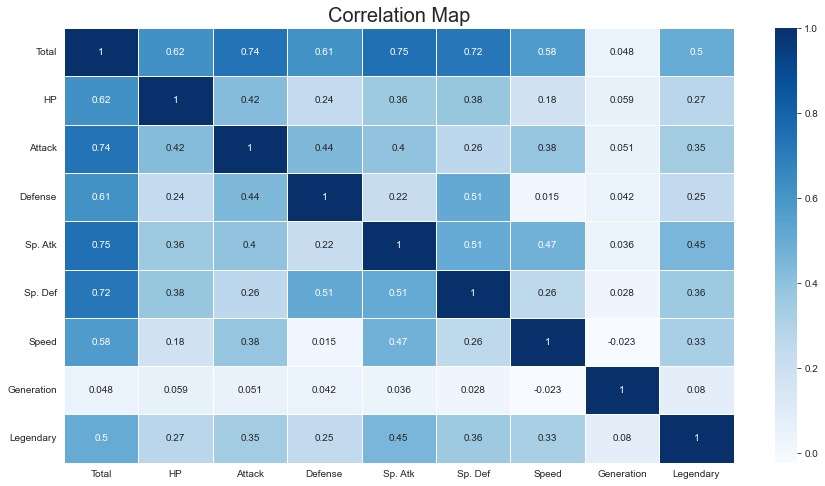

In [11]:
# Correlation map
plt.figure(figsize=(15,8))
corr = sns.heatmap(data[[ 'Type 1', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr(), annot = True, linewidths=1, cmap='Blues')
corr.set_title(label='Correlation Map', fontsize=20)
corr;

**From Correlation heatap,**
* Legendry is directly proportional and correlated to total strength, special attack of pokemon.
* Total strength of pokemon is strongly correlated to attack, special attack and special defense.

In [12]:
import plotly.express as px
fig = px.pie(data, names='Type 1', color_discrete_sequence=px.colors.sequential.Teal)
fig.show()

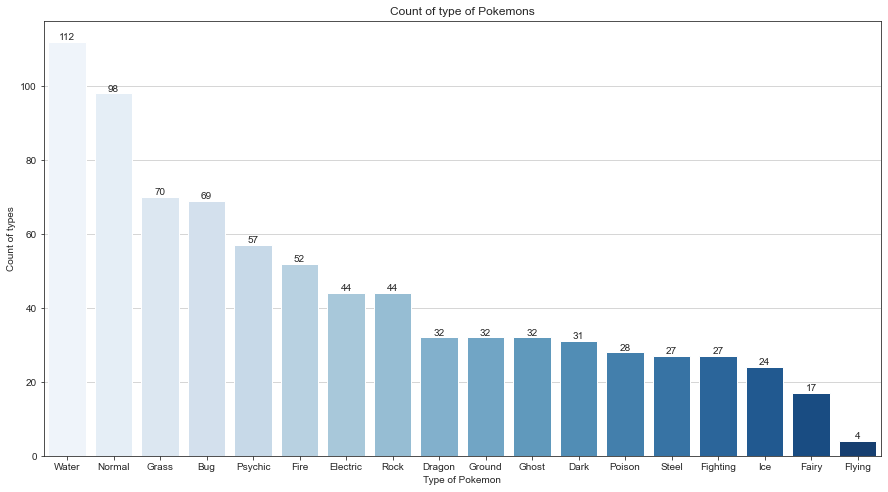

In [13]:
plt.figure(figsize=(15,8))
sns.set_style("ticks",{'axes.grid' : True})
# sns.countplot(x='Type 1', data=data)

ax = sns.countplot(x = "Type 1", 
                   data = data, 
                   order = data["Type 1"].value_counts().index,palette = "Blues")#, as_cmap=True)

abs_values = data['Type 1'].value_counts(ascending=False)
# rel_values = data['Type 1'].value_counts(ascending=False, normalize=True).values * 100
# lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel('Type of Pokemon')
plt.ylabel('Count of types')
plt.title('Count of type of Pokemons')
plt.show()

**Total column defines the sum of all stats that come after this, a general guide to how strong a pokemon is.**

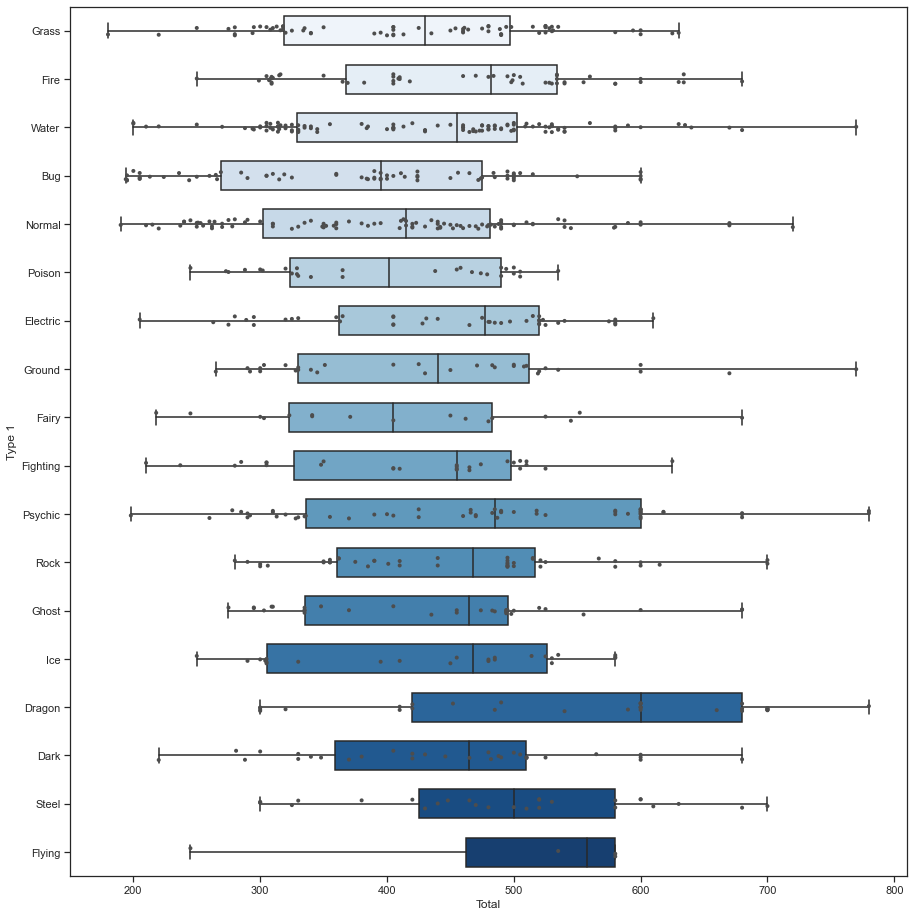

In [14]:
# let's check total strength of pokemon according to their type.
sns.set_theme(style="ticks")
plt.figure(figsize=(15,16))
sns.boxplot(x="Total", y="Type 1", data=data,
            whis=[0, 100], width=.6, palette="Blues")

sns.stripplot(x="Total", y="Type 1", data=data,
              size=4, color=".3", linewidth=0)
plt.show()

**From above chart:** <br>
Water, Ground, Psychic and Dragon type pokemons are most powerful as per their total. <br>
But let's see how their HPs and attacks are distributed.<br>

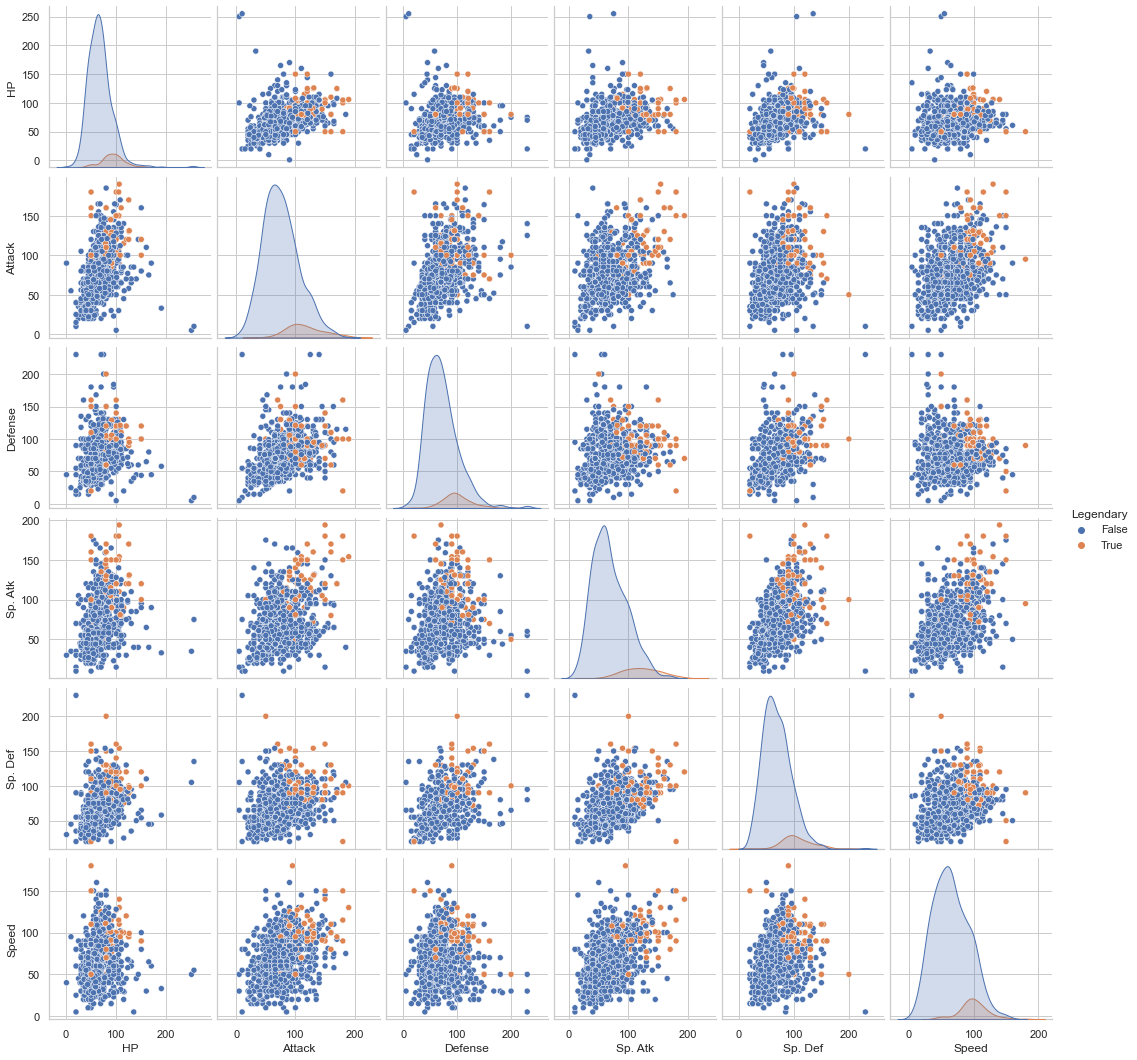

In [48]:
# Paitplot with hue as legendary - blue: 'is not' and orange: 'is legendary'
sns.set_style("whitegrid");
sns.pairplot(data[[ 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']], hue="Legendary");
plt.show()

<AxesSubplot:>

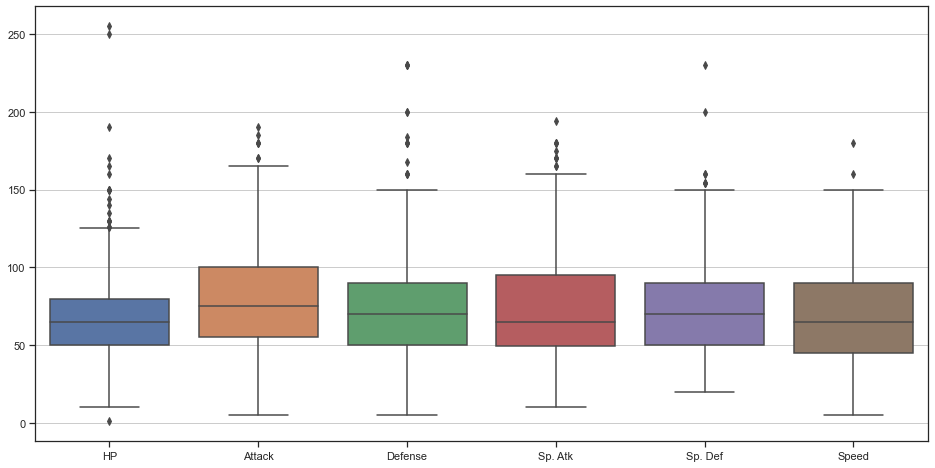

In [16]:
plt.figure(figsize=(16,8))
sns.set_style("ticks",{'axes.grid' : True})
sns.boxplot(data=data[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']])

* **So all these values for most of pokemon is in range of 50-100 numerically.**

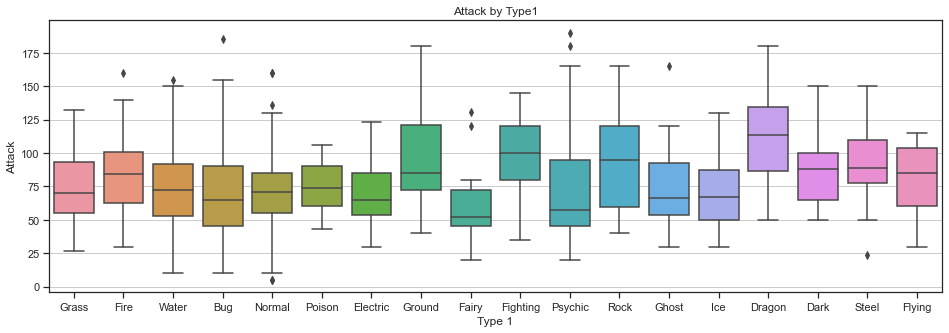

In [17]:
# Attack of pokemon according to their type
plt.subplots(figsize = (16,5))
plt.title('Attack by Type1')
sns.boxplot(x = "Type 1", y = "Attack",data = data)
plt.show()

**Attack of Dragon type pokemon is the most.**

**Fire vs Water type pokemon**

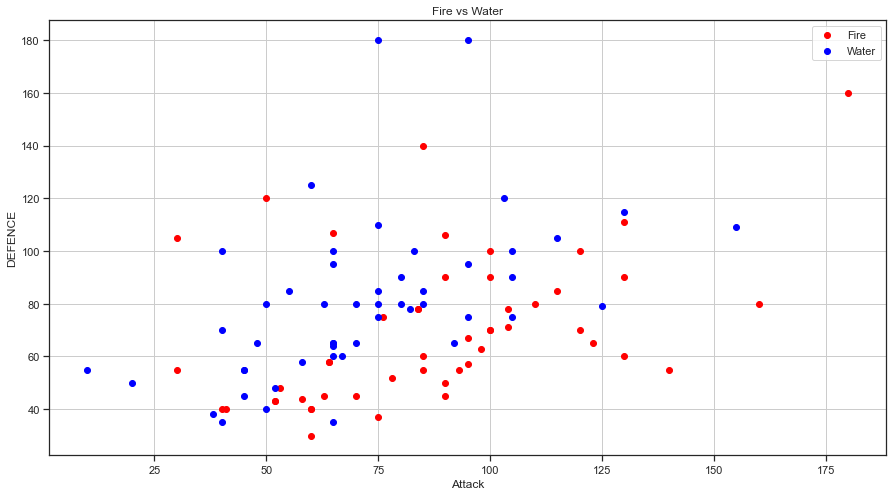

In [18]:
plt.figure(figsize=(15,8))
fire_df=data[(data['Type 1']=='Fire') | (data['Type 2'] == 'Fire')]
water_df=data[(data['Type 1']=='Water') | (data['Type 2'] == 'Water')]

plt.scatter(x = fire_df.Attack.head(50), y = fire_df.Defense.head(50), c='Red', label='Fire')
plt.scatter(x = water_df.Attack.head(50), y = water_df.Defense.head(50), c='Blue', label="Water")

plt.xlabel("Attack")
plt.ylabel("DEFENCE")
plt.title("Fire vs Water")
plt.legend()
plt.show()

**Fire type pokemons have better attack but lower defense than water type pokemons.**

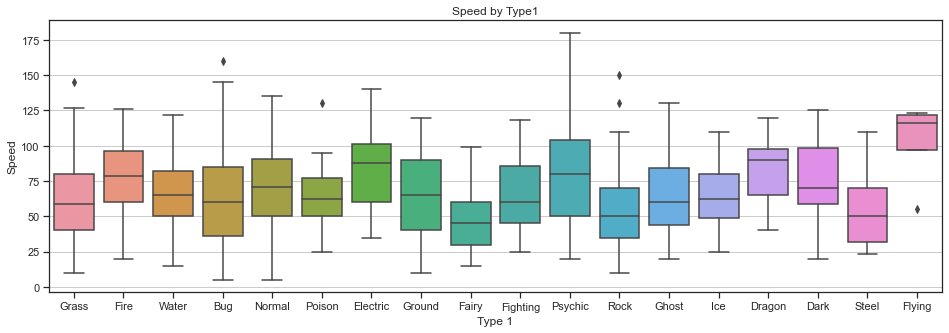

In [19]:
# Speed of pokemon according to their type
plt.subplots(figsize = (16,5))
plt.title('Speed by Type1')
sns.boxplot(x = "Type 1", y = "Speed",data = data)
plt.show()

**Flying Pokemons are faster than any other type.**<br>
**And, apparently, Fairy and steel type pokemon are slowest.**

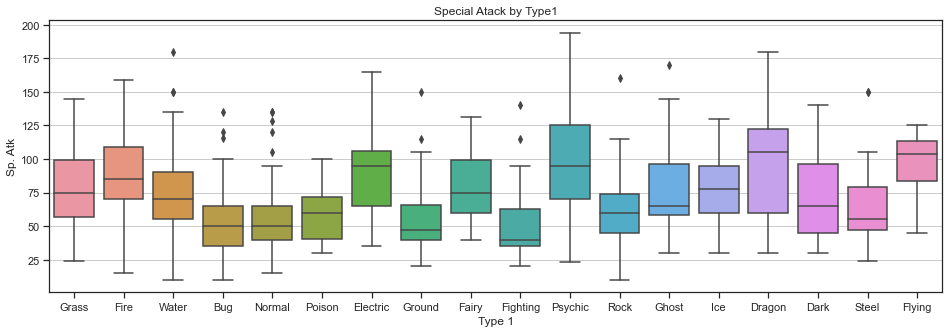

In [20]:
# Checking special attack
plt.subplots(figsize = (16,5))
plt.title('Special Atack by Type1')
sns.boxplot(x = "Type 1", y = "Sp. Atk",data = data)
plt.show()

**Special Attack of Psychic and Dragon pokemon is best.** 

In [21]:
# let's investigate them generation wise
data['Generation'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

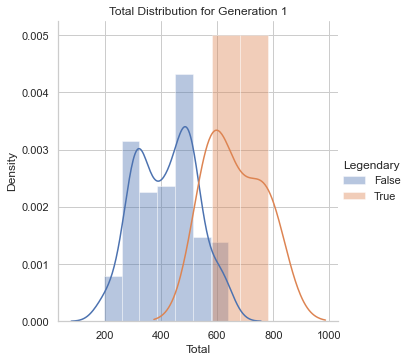

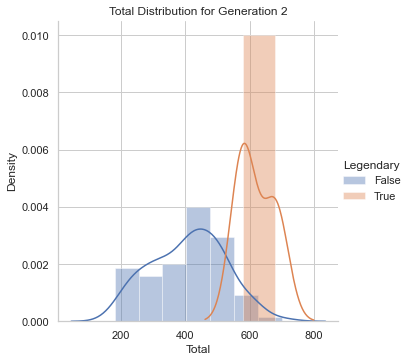

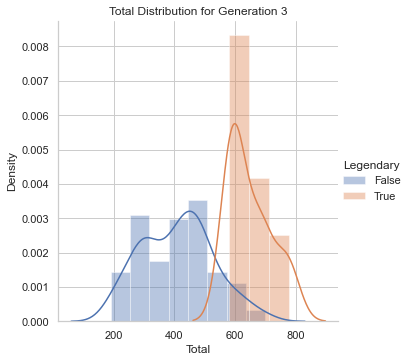

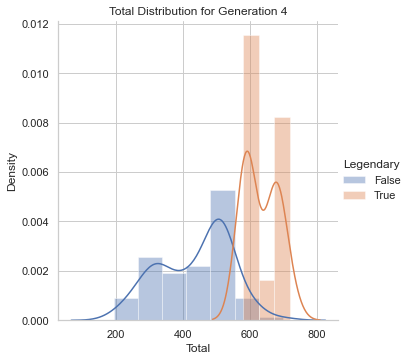

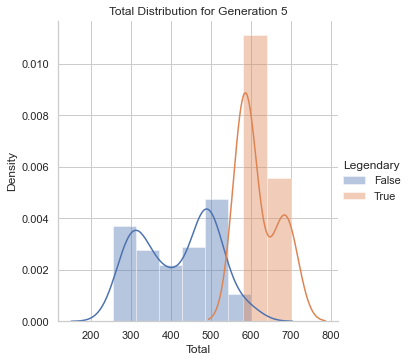

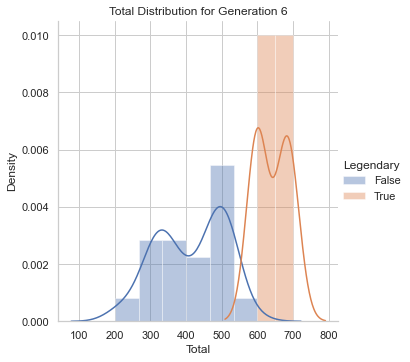

In [46]:
import warnings
warnings.filterwarnings("ignore")

for i in data['Generation'].unique():
    sns.FacetGrid(data[data['Generation']==i], hue="Legendary", height=5).map(sns.distplot, "Total").add_legend()
    plt.title("Total Distribution for Generation "+str(i))
    plt.show()



In [23]:
import plotly.express as px
fig = px.pie(data, 
             names='Generation', 
             color_discrete_sequence=px.colors.sequential.Teal,
            title = 'Pokemon Generations Distribution'
            )

fig.show()

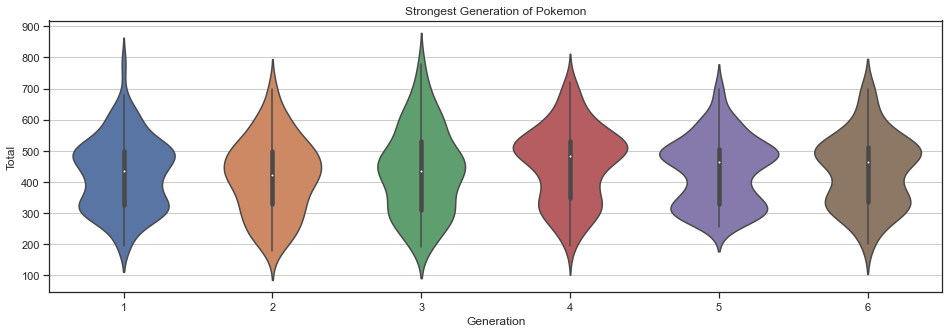

In [24]:
# Comparing total strength of pokemon according to their generation
plt.subplots(figsize = (16,5))
plt.title('Strongest Generation of Pokemon')
sns.violinplot(x = "Generation", y = "Total",data = data)
plt.show()

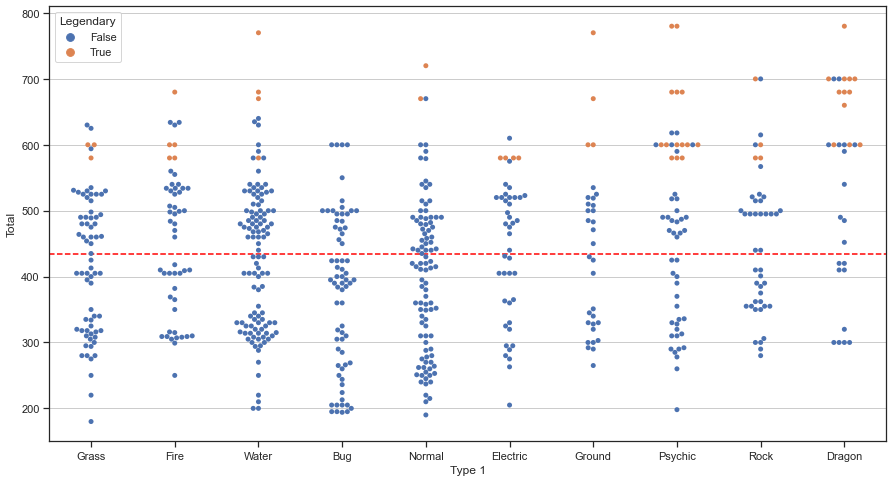

In [25]:
plt.figure(figsize=(15,8))

# take the top 10 Types
top_types = data['Type 1'].value_counts()[:10] 

# take the pokemons of the type with highest numbers, top 10
df1=data[data['Type 1'].isin(top_types.index)] 

# this plot shows the points belonging to individual pokemons
sns.swarmplot(x='Type 1',y='Total',data=df1,hue='Legendary')
plt.axhline(df1['Total'].mean(),color='red',linestyle='dashed')
plt.show()

**Legendary Pokemons are mostly taking the top spots in the Strongest Pokemons.**

<AxesSubplot:xlabel='Legendary', ylabel='Attack'>

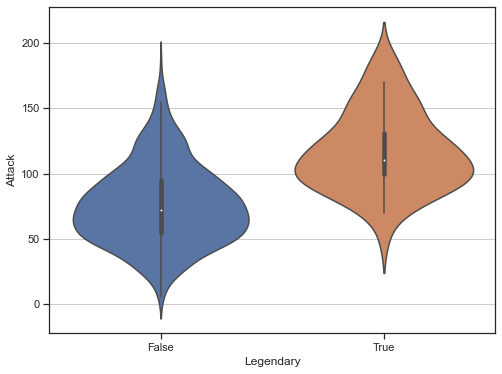

In [26]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Legendary', y='Attack', data=data)

🛠 Work in progress... constructive criticism is always welcome. If you liked it so far, kindly comment and upvote. <br>
Thank you! All the best🤘